# Kinetics - stress tensors and constitutive equations

Created by: Dominik Klein

Contact: dominik.klein@stud.tu-darmstadt.de

Date of creation: 2020-04-28

Last update: 2020-05-14

**Information:**
Run the following cell to define all commands for this notebook. 

In [1]:
%run -i ./code/03_kinetics/main.py

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Description

In this notebook, stress tensors for different configurations and a deviatoric-volumetric split for stress tensors is presented. Hyperelastic strain energy functions and cubic anisotropy provide an insight in constitutive modeling.

This notebook provides interactive content, which can be activated in the cell below. By default, the notebook content is set to static.

**Static:**
Run the following cell for static content (default). 

In [3]:
notebook_static()

<IPython.core.display.Javascript object>

**Interactive:**
Run the following cell for interactive content. 

In [ ]:
notebook_interactive()

# Stress Tensors

The stress tensor defines the state of stress at a given point. It is a tensor-valued quantity of order two.
The Cauchy stress tensor can be represented by the matrix

\begin{equation}
\boldsymbol{\sigma}=
 \begin{bmatrix}
   \sigma_{11} & \sigma_{12} & \sigma_{13} \\
   \sigma_{21} & \sigma_{22} & \sigma_{23} \\
   \sigma_{31} & \sigma_{32} & \sigma_{33}
   \end{bmatrix}
   \end{equation}
   
The main diagonal elements correspond to the normal stresses, the off-diagonal elements correspond to the shear stresses.
   
<img src="files/code/03_kinetics/stress_tensor_components.JPG" alt="Drawing" style="width: 300px;"/>

When we cut a body by a plane surface with normal vector $\boldsymbol{n}$, we get surface traction vectors $\boldsymbol{t}$ on that plane. Cauchy's stress theorem connects normal vector and resulting traction vector at a point $\boldsymbol{x}$ by

\begin{equation}
\boldsymbol{t}\left(\boldsymbol{x},\;\boldsymbol{n}\right)=\boldsymbol{\sigma}\left(\boldsymbol{x},\right)\boldsymbol{n}
\end{equation}

<img src="files/code/03_kinetics/cauchy_theorem.JPG" alt="Drawing" style="width: 250px;"/>

Stress tensors can be formulated with respect to different configurations, e.g., the undeformed reference configuration or the deformed current configuration. The Cauchy stress relates to the deformed configuration, the First Piola-Kirchhoff stress to the undeformed configuration. With the balance of angular momentum it can be shown that the Cauchy stress tensor is always symmetric. The First Piola Kirchhoff stress tensor is in general not symmetric.
An adaption of the latter tensor leads to the Second Piola Kirchhoff stress tensor, which relates to no physical configuration, but is always symmetric.

The stress tensors are related by

\begin{equation}
\begin{aligned}
\text{Cauchy}&\;\;\;\boldsymbol{\sigma}
\\
\text{First Piola-Kirchhoff}&\;\;\;\boldsymbol{P}=J\boldsymbol{\sigma}\boldsymbol{F}^{-T}
\\
\text{Second Piola-Kirchhoff}&\;\;\;\boldsymbol{S}=\boldsymbol{F}^{-1}\boldsymbol{P}
\end{aligned}
\end{equation}

The selection of the stress tensor depends on the desired application. For experimental tensile tests it may be more comfortable to calculate the First Piola Kirchhoff stress, while in computational engineering the symmetric Second Piola Kirchhoff stress is favored.

**Constitutive models**

Regarding purely mechanical processes, stress is caused by deformation. The connection between deformation and resulting stress is given by constitutive equations. The most simple constitutive equation for finite deformations is given by the St. Venant-Kirchhoff stress

\begin{equation}
\boldsymbol{S}=2\cdot\mu\cdot\boldsymbol{E}+\lambda\cdot\text{tr}\left(\boldsymbol{E}\right)\cdot\boldsymbol{I}
\end{equation}

which is an extension for finite deformations of the linear elastic Hooke's law for small deformations.

In the following example, the St. Venant-Kirchhoff stress for a given deformation gradient is evaluated. When the notebook is set to "interactive", the tensile and shear components in the (12)-plane can be variated, as well as the tensile component in the third direction. The shear components in the third direction are set to zero. 

The three introduced stress tensors are evaluated, as well as the eigenvalues and eigendirections of the Second Piola-Kirchhoff and the Cauchy stress. For both stress tensors, the eigenvectors in the (12)-plane are plotted. As they refer to different configurations, the directions of the eigenvectors are also different.

The St. Venant-Kirchhoff model is formulated with the Lamé parameters $\lambda$ and $\mu$. The parameters are set to

\begin{equation}
\begin{aligned}
\lambda&=12.0\;\text{MPa}
\\
\mu&=8.0\;\text{MPa}
\end{aligned}
\end{equation}

which corresponds to the ratio of $\lambda$ to $\mu$ of steel.

Deformation Gradient

F =
[[1.000 0.200 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]]


Second Piola Kirchhoff Tensor

S=
[[0.240 1.600 0.000]
 [1.600 0.560 0.000]
 [0.000 0.000 0.240]]


First Piola Kirchhoff Stress Tensor

P =
[[0.560 1.712 0.000]
 [1.600 0.560 0.000]
 [0.000 0.000 0.240]]


Cauchy Stress Tensor

sigma =
[[0.902 1.712 0.000]
 [1.712 0.560 0.000]
 [0.000 0.000 0.240]]


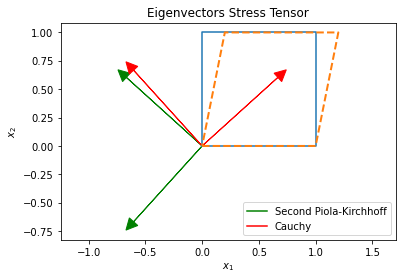

Eigenvalues S
[-1.208 2.008 0.240]

Eigenvectors S (ordered in columns)
[[-0.741 -0.671 0.000]
 [0.671 -0.741 0.000]
 [0.000 0.000 1.000]]


Eigenvalues sigma
[2.452 -0.989 0.240]

Eigenvectors sigma (ordered in columns)
[[0.741 -0.671 0.000]
 [0.671 0.741 0.000]
 [0.000 0.000 1.000]]


In [4]:
stress_tensors()

For small deformations, the stress tensors coincide. For large deformations, the differences become quite significant. 

Below, some experimental rubber data from Treloar (1944) is shown.
Especially for materials like rubber, which can experience large deformations, it is important to specify the choosen stress tensor.

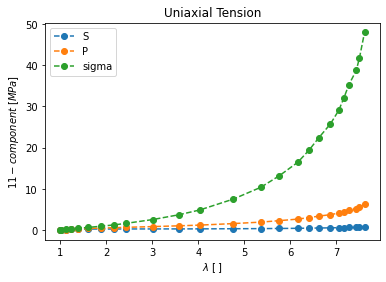

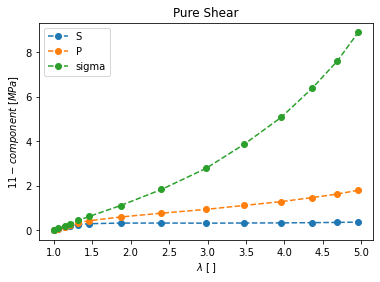

In [5]:
stress_tensors_treloar()

# Deviatoric and Hydrostatic Stress

A stress tensor $\boldsymbol{\sigma}$ can be additive composed into a deviatoric part $\boldsymbol{\sigma}^{dev}$ and a hydrostatic part $\boldsymbol{\sigma}^{hyd}$. 

\begin{equation}
\boldsymbol{\sigma}=\boldsymbol{\sigma}^{dev}+\boldsymbol{\sigma}^{hyd}
\end{equation}

with

\begin{equation}
\begin{aligned}
\boldsymbol{\sigma}^{hyd}&=p\cdot\boldsymbol{I}
\\
\boldsymbol{\sigma}^{dev}&=\boldsymbol{\sigma}-p\cdot\boldsymbol{I}
\end{aligned}
\end{equation}

with the hydrostatic pressure $p$ and the second order unit tensor $\boldsymbol{I}$. As it can be seen from the definition of the hydrostatic pressure $p$  

\begin{equation}
p=\text{trace}\left(\boldsymbol{\sigma}\right)\cdot\frac{1}{3}=\left(\sigma_1+\sigma_2+\sigma_3\right)\cdot\frac{1}{3}
\end{equation}

the trace of the deviatoric part is zero.

This decomposition is applicated in e.g. material modeling. Experimental investigations regarding plasticity and fracture often show an predominant influence of the deviatoric deformation, with practically no influence of the hydrostatic pressure.


In the following example the deviatoric decomposition for an arbitrary Cauchy stress tensor is demonstrated. The result is plotted in the principal stress system. The hydrostatic part runs along the (1,1,1)-axis. Orthogonal to that axis lies the so called Pi-plane. Since it is orthogonal to the hydrostatic axis, the stresses that lie within the Pi-plane exhibit no hydrostatic part. The deviatoric part of the stress lies within the Pi-plane.

Cauchy Stress Tensor

sigma =
[[1.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 0.000]]


sigma_principal_axes =
[[1.618 0.000 0.000]
 [0.000 -0.618 0.000]
 [0.000 0.000 0.000]]


Hydrostatic Cauchy Stress Tensor

p*I =
[[0.333 0.000 0.000]
 [0.000 0.333 0.000]
 [0.000 0.000 0.333]]


Deviatoric Cauchy Stress Tensor

sigma_dev =
[[0.667 1.000 0.000]
 [1.000 -0.333 0.000]
 [0.000 0.000 -0.333]]


./code/03_kinetics/main.py:330: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(x_pi_plane,y_pi_plane,z_pi_plane,alpha=0.1,color='orange')


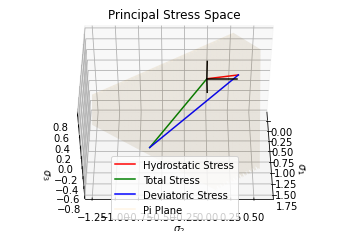

In [6]:
dev_hyd_stress()

# Hyperelasticity

A material is called to behave elastic when there is no dissipation of energy during arbitrary deformation processes, which is equivalent to path independence of the deformation. A direct consequence of that is the independence of the deformation rate.

The fourth order elasticity tensor $\mathbb{C}$ gives a linear mapping between the second order stress tensor $\boldsymbol{S}$ and the second order strain tensor $\boldsymbol{E}$.

\begin{equation}
\boldsymbol{S}=\mathbb{C}:\boldsymbol{E}
\end{equation}

In order to produce a path independent stress tensor, the elasticity tensor must possess the so called major symmetry

\begin{equation}
C_{ijkl}=C_{klij}
\end{equation}

which is often referred to as the definition of hyperelasticity. As the strain tensors introduced in this lecture are also symmetric, the elasticity tensor also possesses the so called minor symmetries

\begin{equation}
C_{ijkl}=C_{jikl}=C_{ijlk}
\end{equation}

Without symmetries, the elasticity tensor has 81 independent components. After consideration of the symmetries, only 21 independent components remain.


The energy stored in hyperelastic materials can be expressed with a energy function $W$ such that

\begin{equation}
\boldsymbol{S}=\frac{\partial W}{\partial \boldsymbol{E}}
\end{equation}

which must fulfill several physical conditions: zero strain must produce zero stress and zero stored energy, while an arbitrary strain unequal zero must result in a stored energy greater than zero. Furthermore, for small deformations it must be consistent with linear elasticity.

Strain energy functions are often expressed in terms of principal stretches or invariants of strain tensors. Thereby the model is independent of the observer, which is another important physical condition.

Some simple forms of hyperelastic strain energy functions are the Neo-Hooke model

\begin{equation}
\begin{aligned}
W&=c_1\left(I_1-3\right)
\\
&=c_1\left(\lambda_1^2+\lambda_2^2+\lambda_3^2-3\right)
\end{aligned}
\end{equation}

the Mooney-Rivlin model

\begin{equation}
\begin{aligned}
W&=c_1\left(I_1-3\right)+c_2\left(I_2-3\right)
\\
&=c_1\left(\lambda_1^2+\lambda_2^2+\lambda_3^2-3\right)+c_2\left(\lambda_1^2\lambda_2^2+\lambda_1^2\lambda_3^2+\lambda_2^2\lambda_3^2-3\right)
\end{aligned}
\end{equation}

and the Ogden model

\begin{equation}
W=\sum_{p=1}^{N}\frac{\mu_p}{\alpha_p}\left(\lambda_1^{\alpha_p}+\lambda_2^{\alpha_p}+\lambda_3^{\alpha_p}-3\right)
\end{equation}

The Ogden model is a polynomial fit with an arbitrary number $N$ of terms, often $N=3$ is the limit in practical usage. While the Ogden model is purely phenomenological, the Neo-Hooke model and the Mooney-Rivlin model can be deduced from physical considerations regarding the micro structure of rubber.


Hyperelastic models are often used to describe the elastic behavior of rubber, which is nearly incompressible. With the incompressibility condition, the principal stresses can be expressed with

\begin{equation}
\sigma_a=\lambda_a\frac{\partial W}{\partial \lambda_a}-p,\;\;a=1,2,3
\end{equation}

where $p$ is a Lagrangian multiplier. The scalar $p$ must be determined from the equilibrium equations, boundary conditions and incompressibilbity condition (see task 4).


In the following example, different hyperelastic strain energy functions are adapted to experimental rubber data [Treloar (1944), Steinmann (2012)]. The models were fitted to uniaxial tension, equibiaxial tension and pure shear data.

The pure shear deformation is applied in the form


\begin{equation}
\boldsymbol{F}=
 \begin{bmatrix}
   \lambda & 0 & 0 \\
   0 & 1 &0 \\
   0 & 0& \lambda^{-1}
   \end{bmatrix}
   \end{equation}

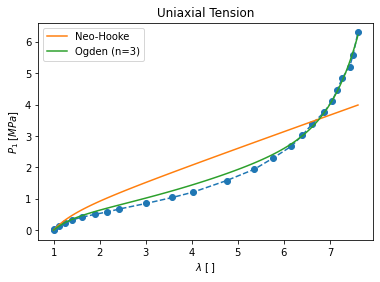

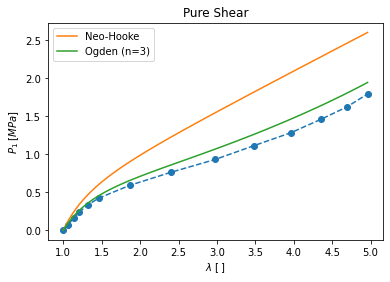

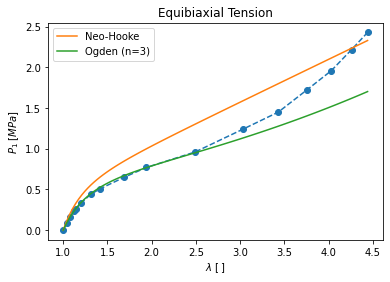

In [7]:
treloar_data_fit()

# Material Symmetry

Most natural and engineering materials have (several) planes and axes of symmetry, which the constitutive models must represent. This additional conditions reduce the number of independent components in the elasticity tensor. The symmetry of a material can be described by a symmetry group ${g}_R$ of orthogonal (rotation) tensors, which contains all symmetries of the material [Haupt (2000)].

For all orthogonal tensors $\boldsymbol{Q}$ in the symmetry group ${g}_R$ of a given material, the strain energy $e$ for an arbitrary deformation $\boldsymbol{E}$ must hold

\begin{equation}
\forall \boldsymbol{E}: \;\boldsymbol{Q} \in {g}_R \;\iff\; e\left(\boldsymbol{Q}\boldsymbol{E}\boldsymbol{Q}^T\right)=e\left(\boldsymbol{E}\right)
\end{equation}

which means that the stored energy remains the same if the applied deformation is rotated by an element of the symmetry group. This can also be formulated as a requirement to the elasticity tensor

\begin{equation}
\forall \boldsymbol{Q} \in {g}_R:\;\mathbb{C}=\boldsymbol{Q}\star\mathbb{C}
\end{equation}

with the Rayleigh-product $\boldsymbol{Q}\star\mathbb{C}$. The Rayleigh-product applies the rotation of the orthogonal tensor $\boldsymbol{Q}$ to all basis vectors of the fourth order tensor $\mathbb{C}$. When all basis vectors of the elasticity tensor are rotated by an element of the material's symmetry group, it must equal the unrotated elasticity tensor.

**Cubic Anisotropy**

One example for anisotropic material behavior is cubic anisotropy, e.g. in the metamaterial shown below. 

<img src="files/code/03_kinetics/RUC_cubic.JPG" alt="Drawing" style="width: 200px;"/>

The symmetry group of an cubic anisotropic material contains of centrosymmetry (pointsymmetry with respect to it's center) and a rotation of 90° around three orthogonal vectors $\left(\boldsymbol{i},\boldsymbol{j},\boldsymbol{k}\right)$:

\begin{equation}
{g}_R=\left(-\boldsymbol{1},\;\boldsymbol{Q}_{\boldsymbol{i}}^{\frac{\pi}{2}},\;\boldsymbol{Q}_{\boldsymbol{j}}^{\frac{\pi}{2}},\;\boldsymbol{Q}_{\boldsymbol{k}}^{\frac{\pi}{2}}\right)
\end{equation}

which results in the elasticity tensor

\begin{equation}
\mathbb{C}=
 \begin{bmatrix}
C_{11} & C_{12} & C_{12} & 0 & 0 & 0 \\
& C_{11} & C_{12} & 0 & 0 & 0 \\
 &  & C_{11} & 0 & 0 & 0 \\
 &  &  & C_{44} & 0 &  0 \\
 & \text{sym.} &  & & C_{44} & 0 \\
 &  &  &  & & C_{44}
   \end{bmatrix}
   \end{equation}

with three independent components. The unrotated elasticity tensor $\mathbb{C}_0$ and the three rotated elasticity tensors

\begin{equation}
\mathbb{C}_i^{\frac{\pi}{2}}=\boldsymbol{Q}_i^{\frac{\pi}{2}}\star\mathbb{C}
\end{equation}

are shown below in the Voigt notation, where the three orthogonal vectors $\left(\boldsymbol{i},\boldsymbol{j},\boldsymbol{k}\right)$ are aligned with the basis system of the elasticity tensor. The elasticity tensor must hold

\begin{equation}
\mathbb{C}_0=\mathbb{C}_i^{\frac{\pi}{2}}=\mathbb{C}_j^{\frac{\pi}{2}}=\mathbb{C}_k^{\frac{\pi}{2}}
\end{equation}

A componentwise comparison of the tensors show which components depend on each other, and which components must be zero.

\begin{equation}
\begin{aligned}
\mathbb{C}_0&=
    \begin{bmatrix}
    C_{11} & C_{12} & C_{13} &  C_{14} &  C_{15} &  C_{16} \\
    & C_{22} & C_{23} &  C_{24} &  C_{25} &  C_{26} \\
     &  & C_{33} &  C_{34} &  C_{35} &  C_{36} \\
     &  &  & C_{44} &  C_{45} &   C_{46} \\
     & \text{sym.} &  & & C_{55} &  C_{56} \\
     &  &  &  & & C_{66}
       \end{bmatrix}
       \\
       \mathbb{C}_i^{\frac{\pi}{2}}&=
    \begin{bmatrix}
    C_{11} & C_{13} & C_{12} &  C_{15} &  -C_{14} &  -C_{16} \\
    & C_{33} & C_{23} &  C_{35} &  -C_{34} &  -C_{36} \\
     &  & C_{22} &  C_{25} &  -C_{24} &  -C_{26} \\
     &  &  & C_{55} &  -C_{45} &   -C_{56} \\
     & \text{sym.} &  & & C_{44} &  C_{46} \\
     &  &  &  & & C_{66}
       \end{bmatrix}
           \\
       \mathbb{C}_j^{\frac{\pi}{2}}&=
    \begin{bmatrix}
    C_{33} & C_{23} & C_{13} &  -C_{36} &  -C_{35} &   C_{34} \\
    & C_{22} & C_{12} & -C_{26} &  -C_{25} &   C_{24} \\
     &  & C_{11} & -C_{16} &  -C_{15} &   C_{14} \\
     &  &  & C_{66} &   C_{56} &   -C_{46} \\
     & \text{sym.} &  & & C_{55} & -C_{45} \\
     &  &  &  & & C_{44}
       \end{bmatrix}
                 \\
       \mathbb{C}_k^{\frac{\pi}{2}}&=
    \begin{bmatrix}
    C_{22} & C_{12} & C_{23} &  -C_{24} &   C_{26} &  -C_{25} \\
    & C_{11} & C_{13} & -C_{14} &   C_{16} &  -C_{15} \\
     &  & C_{33} & -C_{34} &   C_{36} &  -C_{35} \\
     &  &  & C_{44} &  -C_{46} &    C_{45} \\
     & \text{sym.} &  & & C_{66} & -C_{56} \\
     &  &  &  & & C_{55}
       \end{bmatrix}
\end{aligned}
\end{equation}


A graphical representation of anisotropic material behavior is presented in Böhlke (2001). The stiffness of anisotropic materials under uniaxial tension depends on the direction in which the tension is applied. An evaluation of the elasticity tensor gives the stiffness under uniaxial tension - the Young's modulus - in each spatial direction.

In the figure below, the Young's modulus for cubibc anisotropy dependent on the spatial direction is shown.

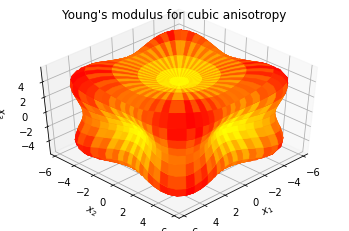

In [8]:
cubic_anisotropy_visualization()

# Further Information

Holzapfel, G. (2000). Nonlinear solid mechanics: a continuum approach for engineering.

Treloar, L.R.G. (1944). Stress-strain data for vulcanised rubber under various types of deformation.

Treloar, L.R.G. (1975). The Physics of Rubber Elasticity.

Steinmann, P. et al. (2012). Hyperelastic models for rubber-like materials: consistent tangent operators and suitability for Treloar's data.

Böhlke, T. et al. (2001). Graphical Representation of the Generalized Hooke's Law.

Haupt, P. (2000). Continuum Mechanics and Theory of Materials.

In [2]:
# Magic functions for interactive graphs
def interactive_plot(x):
    if x:
        %matplotlib notebook
    else:
        %matplotlib inline